<a href="https://colab.research.google.com/github/jakubtwalczak/dsbootcampudemy/blob/main/6_Uczenie_maszynowe/3_Regresja_liniowa_budowa_modelu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wprowadzenie.

Jak tworzy się najprostszy model regresji liniowej? Zdefiniujmy:
- $X_1, X_2, ..., X_n$ - zmienne niezależne/predyktory (nasze dane do modelu)
- $Y$ - zmienna docelowa
- $y_{true}$ - wartość rzeczywista
- $y_{pred}$ - wartość przewidziana przez model
- $w_0, w_1,...,w_n$ - wagi do modelu (podlegaja uczeniu)

W tym modelu zakłada się. ze wartość przewidywana $y_{pred}$ może być liniową kombinacją zmiennych niezależnych. Ogólna postać modelu:

>  $$y_{pred}(W, X) = w_0 + w_1X_1 + ... + w_nX_n$$
>  $$Y = XW$$

gdzie:
>  $X = \begin{pmatrix} 1 & X_1 & X_2 & \dots & X_n\end{pmatrix}$,  $W = \begin{pmatrix} w_{0} \\  w_{1}  \\ \dots \\ w_{n}\end{pmatrix}$

Ponieważ tablica $X$ ma tyle kolumn, ile tablica $W$ wierszy, możemy je przez siebie mnożyć. W efekcie otrzymujemy tablicę $Y$.

Wprowadźmy oznaczenia:
- $w = (w_1,...w_n)$ - wagi jako `coef_`
- $w_0$ - wyraz wolny jako `intercept_`

Regresja Liniowa polega na takim dopasowaniu wag $w_0, w_1,...,w_n$ by zminimalizować funkcję kosztu(cost function):
>$$||XW-Y||_{2}^{2} \rightarrow min$$

Funkcją tą jest metryka MSE.

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

Jest to nic innego niż równanie funkcji liniowej, gdzie $w_0$ jest punktem przecięcia z osią Y, zaś $w_1$ jest współczynnikiem kierunkowym nachylenia prostej.

Przykład w $R^3$:  
$Y=w_0 + w_1X_1 + w_2X_2$

Aby zastosować podstawową regresję liniową, muszą być spełnione następujące założenia:
* mamy zależność liniową
* wariancja reszt jest taka sama dla wszystkich obserwacji
* brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)

# Generowanie danych.

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

Generujemy dane z rozkładu normalnego, dodając do nich szum. Będzie to najprostszy przykład, tj. 200 próbek i jedna zmienna objaśniająca.

In [1]:
import numpy as np
np.random.seed(42)

X = np.arange(0, 100, 0.5)
noise = 10 * np.random.randn(200)
y = 2 * X + 200 + noise
X = X.reshape(-1, 1)

print('Rozmiar X:',X.shape)
print('Rozmiar y:', y.shape)

Rozmiar X: (200, 1)
Rozmiar y: (200,)


# Podział zbiorów.

Naturalnie dane dzielimy na zbiór treningowy (75% próbek) i testowy (25% próbek).

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train_shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape: (150, 1)
X_test shape: (50, 1)
y_train_shape (150,)
y_test shape (50,)


Zwizualizujmy sobie dane z obu zbiorów: na niebiesko zaznaczamy zbiór treningowy, a na niebiesko - testowy. Dane podzielone zostały w sposób losowy.

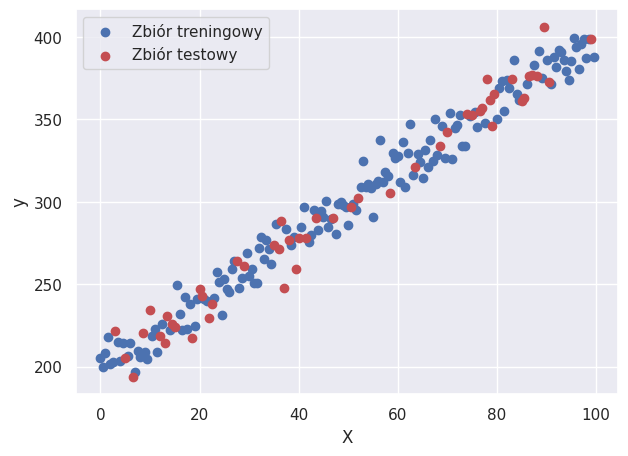

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='r', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Budowa i trening modelu.

Importujemy klasę **LinearRegression**, następnie tworzymy jej instancję i dopasowujemy do danych treningowych (niebieski kolor na wykresie). Wyświetlimy również wagę (atrybut **coef_**) i wyraz wolny (atrybut **intercept_**).

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[2.00923224]
199.27936460466083


A zatem równanie regresji przebiega następująco:
$Y= 2,01\cdot X_1 + 199,28$   

# Wizualizacja.

Wyrysowujemy linię regresji dla danych treningowych. Jest to najlepsze dopasowanie, jakie nasz model był w stanie znaleźć dla naszych danych.

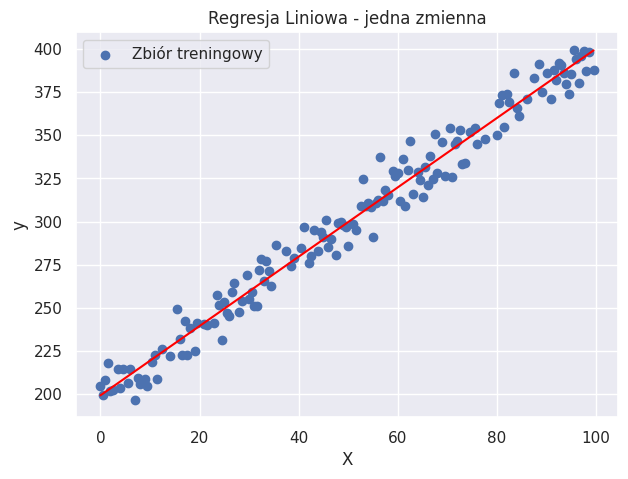

In [5]:
plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Ważne jest jednak to, jak model działa na danych, których nie widział, tj. jaka jest jego zdolność do generalizacji.

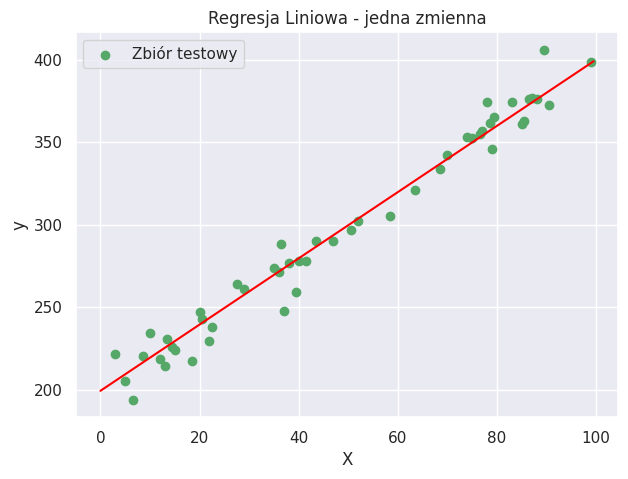

In [6]:
y_pred = lin_reg.predict(X_test)
plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Widzimy, że model ma pewne błędy, ale generalnie jego dopasowanie jest niezłe. Kluczowym dla budowy modelu uczenia maszynowego nadzorowanego (niezależnie od zadania - czy to regresja, czy klasyfikacja) jest zapewnienie odpowiedniego wolumenu danych treningowych.

# Ocena modelu.

Użyjemy do tego metody **score** i przekażemy mu tylko dane testowe. Metoda ta zwraca współczynnik determinacji naszego modelu.

In [7]:
lin_reg.score(X_test, y_test)

0.9727851463290392

Wynik ten oznacza, że nasza linia regresji wyjaśnia nieco ponad 97% dopasowania modelu do próby.

# Złe dopasowanie.

W tym wypadku nie mamy liniowo przebiegającej regresji - lepiej sprawdziłaby się np. regresja wielomianowa.

[-1.1345229]
21.370600947833232


Text(0, 0.5, 'y')

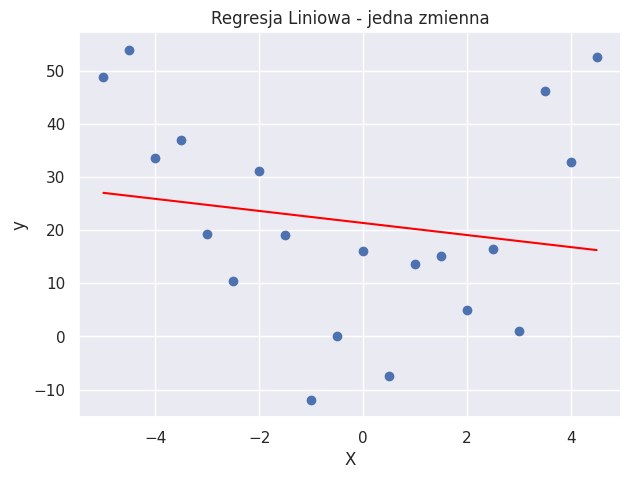

In [8]:
X = np.arange(-5, 5, 0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')